In [1]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Gender': ['Female', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'State_names': ['New York', 'California', 'New York', 'Texas', 'New York', 'New York'],
    'Age': [25, 30, 22, 40, 35, 29],
    'Marital_status': ['Married', 'Single', 'Married', 'Single', 'Married', 'Married'],
    'Payment_method': ['Credit Card', 'Debit Card', 'Cash', 'Credit Card', 'Cash', 'Debit Card'],
    'Amount_spent': [200, 150, 180, 220, 170, 200]
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_file_path = 'customer_data.csv'
df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' has been created.")

CSV file 'customer_data.csv' has been created.


In [13]:
# Provide the path to your CSV file
# Replace with the actual path to your CSV file
csv_file_path = 'customer_data.csv'
col = ['Gender', 'State_names', 'Age', 'Marital_status',
       'Payment_method', 'Amount_spent', 'Salary']
# Use read_csv to read the data from the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, usecols=col)
# first create 3 condition
female_person = df['Gender'] == 'Female'
married_person = df['Marital_status'] == 'Married'
loc_newyork = df['State_names'] == 'New York'

print(df[female_person & married_person & loc_newyork].head(4))

df[['Age', 'Amount_spent', 'Salary']].groupby(df['Gender']).max()

   Gender State_names  Age Marital_status Payment_method  Amount_spent  Salary
0  Female    New York   25        Married    Credit Card           200   10000
2  Female    New York   22        Married           Cash           180   12000
5  Female    New York   29        Married     Debit Card           200   11000


,Age,Amount_spent,Salary
Gender,,,
Female,40,220,13000
Male,35,170,15000


In [14]:
import pandas as pd
# Provide the path to your CSV file
# Replace with the actual path to your CSV file
csv_file_path = 'customer_data.csv'
# Use read_csv to read the data from the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
# Group by one columns
print(df[['Age', 'Gender', 'Amount_spent']].groupby(['Gender']).agg(['count', 'mean',
                                                                    'max']))

         Age           Amount_spent            
       count  mean max        count   mean  max
Gender                                         
Female     4  29.0  40            4  200.0  220
Male       2  32.5  35            2  160.0  170


In [16]:
import pandas as pd
# Provide the path to your CSV file
# Replace with the actual path to your CSV file
csv_file_path = 'customer_data.csv'
# Use read_csv to read the data from the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
# Group By multiple columns
state_gender_res = df[['State_names', 'Gender', 'Payment_method', 'Amount_spent']].groupby([
    'State_names', 'Gender', 'Payment_method']).agg(['count', 'min', 'max'])
# fetch top 12 records meeting the above condition
print(state_gender_res.head(12))

                                  Amount_spent          
                                         count  min  max
State_names Gender Payment_method                       
California  Male   Debit Card                1  150  150
New York    Female Cash                      1  180  180
                   Credit Card               1  200  200
                   Debit Card                1  200  200
            Male   Cash                      1  170  170
Texas       Female Credit Card               1  220  220


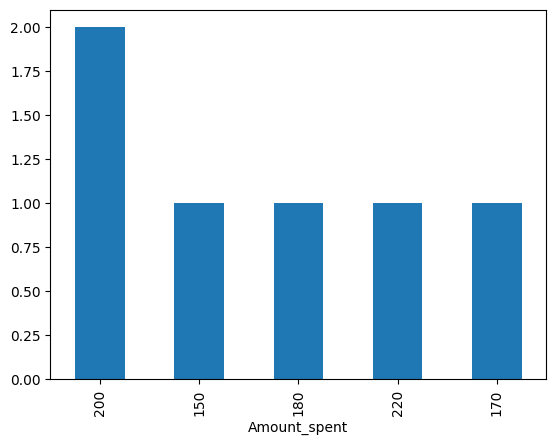

In [21]:
import pandas as pd
# Provide the path to your CSV file
# Replace with the actual path to your CSV file
csv_file_path = 'customer_data.csv'
# Use read_csv to read the data from the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.dropna(inplace=True)
df['Amount_spent'].value_counts().plot(kind='bar')

In [1]:
import pandas as pd
import numpy as np
data = {
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
    'Category': ['A', 'B', 'A', 'C', 'B'],
    'Sales': [100.345, 200.2345, 300.4567, 400.567, 500.678],
    'Quantity': [10, 20, 15, 25, 30]
}

df = pd.DataFrame(data)
pivot_table = pd.pivot_table(df, values='Sales', index='Date', columns='Category', aggfunc={'Sales': 'sum'}, fill_value=0, dropna=False, margins=True, margins_name='Total')
np.round(pivot_table, 1)



Category,A,B,C,Total
Date,,,,
2021-01-01,100.3,0.0,0.0,100.3
2021-01-02,0.0,200.2,0.0,200.2
2021-01-03,300.5,0.0,0.0,300.5
2021-01-04,0.0,0.0,400.6,400.6
2021-01-05,0.0,500.7,0.0,500.7
Total,400.8,700.9,400.6,1502.3


In [6]:
csv_file_path = 'customer_data.csv'

df = pd.read_csv(csv_file_path)

df.query('Age>=29 & Amount_spent>=200',inplace=True)
df

,Gender,State_names,Age,Marital_status,Payment_method,Amount_spent,Salary
3,Female,Texas,40,Single,Credit Card,220,13000
5,Female,New York,29,Married,Debit Card,200,11000
